# Chai Time Data Science

### About Sanyam & the show :

Chai Time Data Science is a bi-weekly and ad-free podcast series by Sanyam Butani . Sanyam has completed his bachelors in Computer Science from a reputed university in India .Currently he is working as a Machine learning Engineer with H2O.ai .

Sanyam's podcast series has leading experts & practioners in Data science domain and top kagglers who share their data science experience and journey , discuss about their winning competition solutions along with a cup of Chai(Tea). His podcast is available to listen in popular platforms like achor.fm,apple podcast,spotify and youtube .


### What we are going to do in this notebook?

The dataset provided to us has all the details on the CTDS episodes ,person interviewed,release dates, the type of chai (very interesting),youtube,ahchor & spotify statistics .

In this kernel , I am going to analyse the youtube statistics for the podcast episodes and provide an insight on the trends of the show.Lets jump straight into the analysis.


### Short Summary of the Analysis

In short , the analysis can be summarised as follows ,

1.When it comes to total impressions , **having youtube default thumbnail may attract a higher impression but Click throuh rate(CTR) might not be high . Sanyam should use custom CTDS thumbnail which has had higher median click through rates compared to other thumbnails though it has had lesser impressions**

2.A comparision of impressions and view tells us that the **higher the number of impressions the higher were the view** and episodes featuring an **Industry expert or Kaggler has had higher impressions**.Out of the 85 episodes , 40 episodes has featured Industry experts and 36 episodes have featured Kagglers .Going by this statistic , **irrespective of the experts , CTDS show as a whole has had higher impressions.**

3.Click through rates  have been higher even when there were lower impressions which explains the fact that **CTDS has got strong subscribers from the community who tuned in to each episode.** Also,Median CTR's were nearly equal for a show featuring Industry experts and Reseachers followed by Kagglers.

4.The average watch duration has been around 4-6 minutes across the episodes.The episode duration has hovered around 50 to 75 mins.The **average watch duration was higher for episodes featuring Kagglers and Industry experts which constitutes around 76 % of the total 85 epsiodes.**




### Loading the required libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import Image
import os
for dirname, _, filenames in os.walk('/ctds'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
kaggle=0
if kaggle==1:
    data=pd.read_csv('../input/data/Episodes.csv')
else:
    data=pd.read_csv('../data/Episodes.csv')
    yt_thumbnail=pd.read_csv('../data/YouTube Thumbnail Types.csv')

### Summary of data

In [3]:
data.head()

,episode_id,episode_name,heroes,heroes_gender,heroes_location,heroes_nationality,heroes_kaggle_username,heroes_twitter_handle,category,flavour_of_tea,...,youtube_subscribers,anchor_url,anchor_thumbnail_type,anchor_plays,spotify_starts,spotify_streams,spotify_listeners,apple_listeners,apple_listened_hours,apple_avg_listen_duration
0,E0,Chai Time Data Science Launch Announcement,NaN,NaN,NaN,NaN,NaN,NaN,Other,Masala Chai,...,3,https://anchor.fm/chaitimedatascience/episodes...,0.0,553.0,491.0,262.0,359.0,29.0,1.0,117.0
1,E1,"Kaggle Triple Grandmaster, Abhishek Thakur Int...",Abhishek Thakur,Male,Norway,India,abhishek,abhi1thakur,Kaggle,Ginger Chai,...,60,https://anchor.fm/chaitimedatascience/episodes...,0.0,1271.0,826.0,608.0,456.0,56.0,25.0,1621.0
2,E2,"Interview with Kaggle Master, ML Engineer: Rya...",Ryan Chesler,Male,USA,USA,ryches,ryan_chesler,Kaggle,Masala Chai,...,3,https://anchor.fm/chaitimedatascience/episodes...,0.0,681.0,398.0,274.0,214.0,19.0,10.0,1879.0
3,E3,"Interview with CEO of SharpestMinds, Edouard H...",Edouard Harris,Male,Canada,Canada,NaN,neutronsNeurons,Industry,Kashmiri Kahwa,...,1,https://anchor.fm/chaitimedatascience/episodes...,0.0,638.0,334.0,230.0,169.0,10.0,4.0,1344.0
4,E4,Data Science for Good: City of LA Kaggle Winni...,Shivam Bansal,Male,Singapore,India,shivamb,shivamshaz,Kaggle,Apple Cinnamon,...,4,https://anchor.fm/chaitimedatascience/episodes...,0.0,495.0,201.0,139.0,123.0,17.0,3.0,633.0


In [4]:
data.shape

(85, 36)

There are 85 rows and 36 columns .The episodes are defined by a unique episode_id key .A glimpse of that column provides an understanding that there were 75 episodes and 9 Mini-series .

In [5]:
data[data['episode_id'].str.contains('M')][['episode_id','episode_name']]

,episode_id,episode_name
46,M0,00 Introduction & About: fast.ai 2019 & Things...
47,M1,01: Lesson-1 Image Classification | fast.ai 20...
48,M2,02: Lesson-2 Production & SGD From Scratch | f...
49,M3,03: Lesson-3 Multi-label; SGD from scratch | f...
50,M4,04: Lesson-4 NLP:Tabular Data; Recsys | fast.a...
51,M5,05: Lesson 5: Backprop; Neural Nets from scrat...
52,M6,06: Lesson-6 CNN Deep Dive; Ethics | fast.ai 2...
53,M7,07: Lesson-7 ResNet; U-Net; GANs | fast.ai 201...
54,M8,"08: Where to go from here, General fast.ai advice"


The mini-series episodes are about fast.ai course summaries and it has nine episodes in total.

### Some Youtube Statistics Definitions

Before we produce the results of the analysis , let me share the details of the youtube statistics columns. These statistics will also be explained in details in the respective analysis part.The definitions are based on my understanding and little research I did for the purpose of writing this notebook.Please feel free to correct me if I have got any concepts wrong .

* youtube_thumbnail_type - This is the embedded picture which we see in the youtube when we search for or come across any video . A separate file on the thumbnail is provided in this dataset.

* youtube_impressions - According to [google support](https://support.google.com/youtube/answer/9314486?hl=en#:~:text=An%20impression%20is%20counted%20when,shown%20to%20someone%20on%20YouTube.&text=For%20example%2C%20impressions%20are%20counted,shown%20on%20a%20different%20website.) , an youtube impression is a count of how many times your thumbnail were shown to viewers on Youtube .For example , I use youtube for searching datarelated content and based on my previous history and like , youtube shows the CTDS thumbnail . This is counted as an impression . An count of the impression does not mean that the user has seen the content . Also , this impression number does not count the instances the thumbnail is shown outside of the youtube .

* youtube_impression_views - This is the number of views generted after seeing the thumbnail and an user has watched it .

* youtube_ctr - CTR is Click through rate which measures how much percentage of the impressions turned into views .ie . user clicked the thumbnail after he has scrolled it.

* youtube_nonimpression_views - These are the impression count outside of the youtube.com.

* youtube_views - This is the total number of legitimate views for the videos. ( impression + nonimpression views)

* youtube_avg_watch_duration - This is the average duration a user has viewed in the total video time.

### How has the thumbnail impacted CTDS show ?

In [11]:
yt_thumbnail.columns

Index(['youtube_thumbnail_type', 'description', 'youtube_default',
       'annotation', 'mini_series', 'ctds_brand'],
      dtype='object')

In [12]:
yt_thumbnail[['youtube_thumbnail_type','description']]

,youtube_thumbnail_type,description
0,0,YouTube default image
1,1,YouTube default image with custom annotation
2,2,Mini Series: Custom Image with annotations
3,3,"Custom image with CTDS branding, Title and Tags"


In [29]:
data['youtube_thumbnail_type'].value_counts()

0    50
3    16
1    10
2     9
Name: youtube_thumbnail_type, dtype: int64

50 of the 85 episodes have had youtube default image as thumbnail whereas 16 episodes have CTDS custom branding image as thumbnail.

In [10]:
data=data.join(yt_thumbnail.set_index('youtube_thumbnail_type'),on='youtube_thumbnail_type',how='inner')

This is how the youtube default image thumbnail will look like .For each of the episodes the episodes hero was featured in the thumbnail.

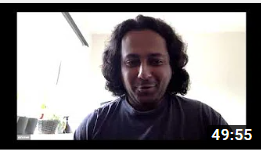

In [23]:
Image(filename = "../imgs/youtube_default.PNG", width=300, height=300)

Youtube default image with custom annotation is similar to default but we can annotate with text like this ,

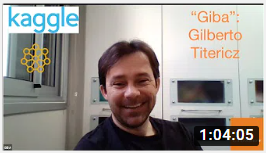

In [24]:
Image(filename = "../imgs/youtube_default_ca.PNG", width=300, height=300)

This is how the mini-series episodes had their thumbnail,

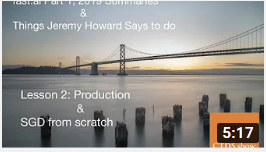

In [27]:
Image(filename = "../imgs/miniseries.PNG", width=300, height=300)

The custom image with CTDS branding is what is used for recent episodes and they look like these,

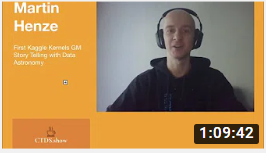

In [30]:
Image(filename = "../imgs/custom_ctds.PNG", width=300, height=300)

### Youtube Impressions and Views

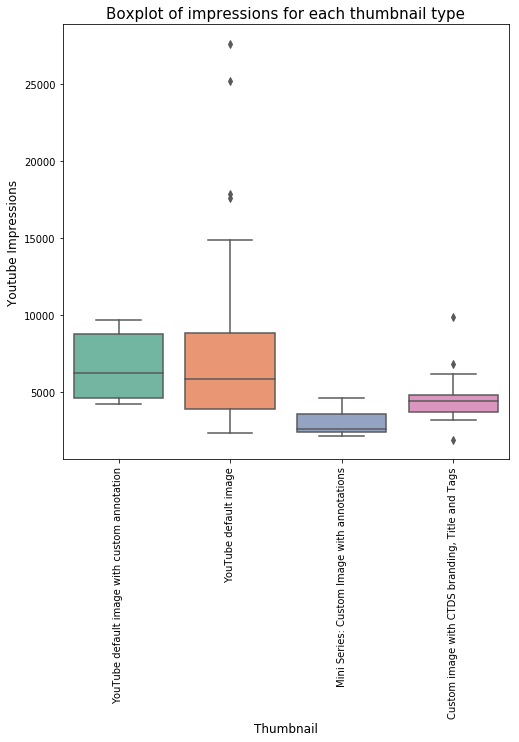

In [13]:
plt.figure(figsize=(8,8))
ax=sns.boxplot(x=data['description'],y=data['youtube_impressions'],palette=sns.color_palette('Set2'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Boxplot of impressions for each thumbnail type",fontsize=15)
plt.xlabel("Thumbnail",fontsize=12)
plt.ylabel("Youtube Impressions",fontsize=12)
plt.show()

The median impression count for youtube default with custom annotation is slightly higher followed by youtube default. There were also several outliers with the youtube default thumbnail.Also,we have to note here that an impression should be interpreted within a specific time range . Therefore , here I assume the time rage as from the time of upload of the video to the time when the data was extracted.

How much of these impressions get converted into views for each thumbnail ?.youtube_views column gives the total views .

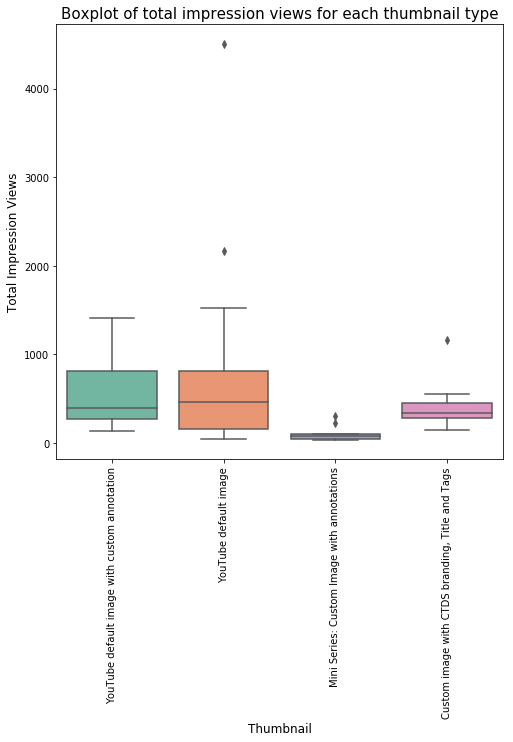

In [14]:
plt.figure(figsize=(8,8))
ax=sns.boxplot(x=data['description'],y=data['youtube_views'],palette=sns.color_palette('Set2'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Boxplot of total impression views for each thumbnail type",fontsize=15)
plt.xlabel("Thumbnail",fontsize=12)
plt.ylabel("Total Impression Views",fontsize=12)
plt.show()

* Youtube default thumbnail has got higher impression views overall compared to other thumbnails .There had been 50 episodes which had youtube default thumbnail .The custom CTDS branding thumbnail which is used for the current episodes has 334 impression views.

* Comparing the impressions and impression views boxplot , can we say that when the impressions were higher , there were more views ? .Lets understand . 

* Since we measure the impressions only for the youtube platform , comparing the youtube_views column with the youtube_impression might provide wrong results . Therefore we consider only youtube_impression_views column to compare with the youtube_impressions column to make apple to apple comparison.

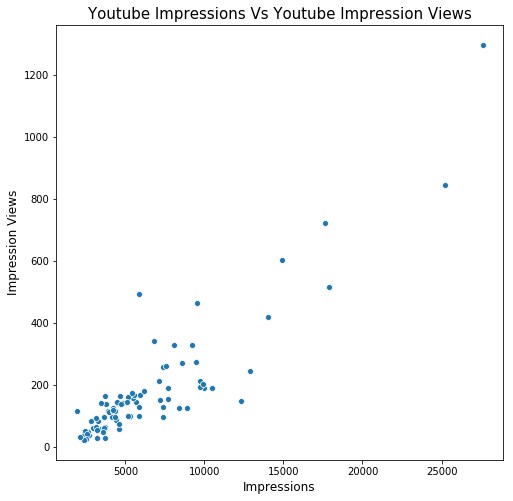

In [43]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=data['youtube_impressions'],y=data['youtube_impression_views'])
plt.title("Youtube Impressions Vs Youtube Impression Views",fontsize=15)
plt.xlabel("Impressions",fontsize=12)
plt.ylabel("Impression Views",fontsize=12)
plt.show()

The plot between imporessions and impression views has been linear .The higher the impressions were , the higher were the view.Which category of episodes had higher impression ?

### Impressions and Category

In [33]:
data['category'].value_counts()

Industry    34
Kaggle      31
Other       11
Research     9
Name: category, dtype: int64

Of the 85 episodes , 34 interviews have been from Industry and 31 has been from Kagglers.

Text(0, 0.5, 'Youtube Impressions')

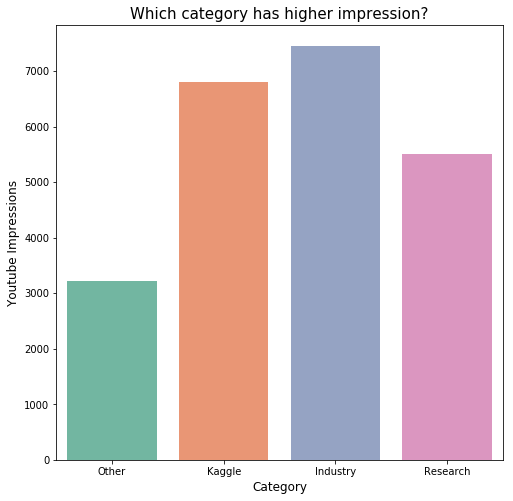

In [50]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['category'],y=data['youtube_impressions'],palette=sns.color_palette('Set2'),ci=None)
plt.title("Which category has higher impression?",fontsize=15)
plt.xlabel("Category",fontsize=12)
plt.ylabel("Youtube Impressions",fontsize=12)

Episodes featuring an Industry expert or a Kaggler has had higher impressions than Research .The thumbnail videos appear based on the relevancy of a persons youtube search .We can make a cautious conclusion here that those who get the CTDS thumbnail recommendations are Kagglers or working in full time data science roles.

But , has these impression turn into views ? Lets find out.

Text(0, 0.5, 'Youtube Impression Views')

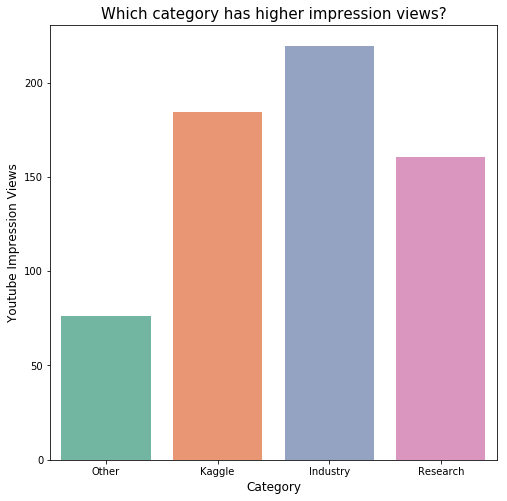

In [51]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['category'],y=data['youtube_impression_views'],palette=sns.color_palette('Set2'),ci=None)
plt.title("Which category has higher impression views?",fontsize=15)
plt.xlabel("Category",fontsize=12)
plt.ylabel("Youtube Impression Views",fontsize=12)

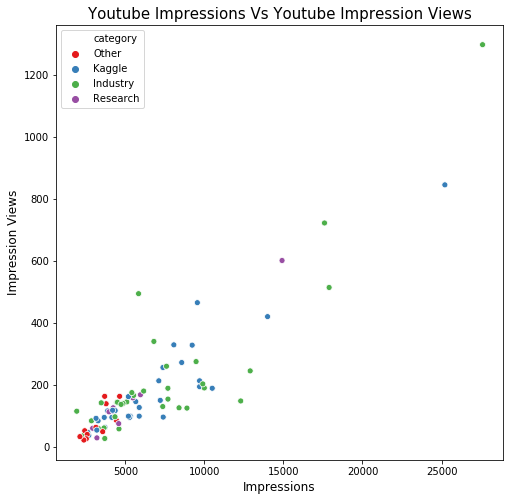

In [30]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=data['youtube_impressions'],y=data['youtube_impression_views'],hue=data['category'],palette='Set1')
plt.title("Youtube Impressions Vs Youtube Impression Views",fontsize=15)
plt.xlabel("Impressions",fontsize=12)
plt.ylabel("Impression Views",fontsize=12)
plt.show()

From the scatter plot it is seen that the impressions and impression views has been linear with respect to the categories.

### Click Through Rate Vs Impressions

We have already discussed that the impressions are only a potential way to get the viewers interested in a video . CTR metric tells us the actuall percentage of those impressions which got converted into a view.

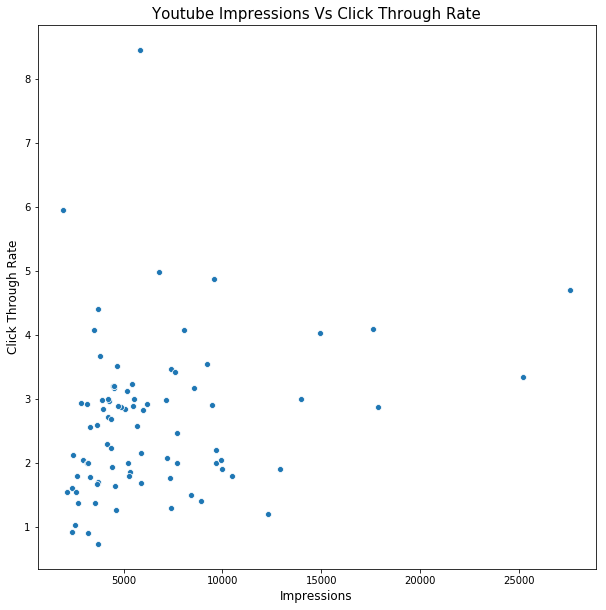

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['youtube_impressions'],y=data['youtube_ctr'])
plt.title("Youtube Impressions Vs Click Through Rate",fontsize=15)
plt.xlabel("Impressions",fontsize=12)
plt.ylabel("Click Through Rate",fontsize=12)
plt.show()

Ah , now we see a different picture .Impressions do not primarily drive the views to CTDS episodes.There have been higher CTR's even when the impressions were lower.

How has the thumbnails helped gaining CTR's ?

### Click through rate and Thumbnails 

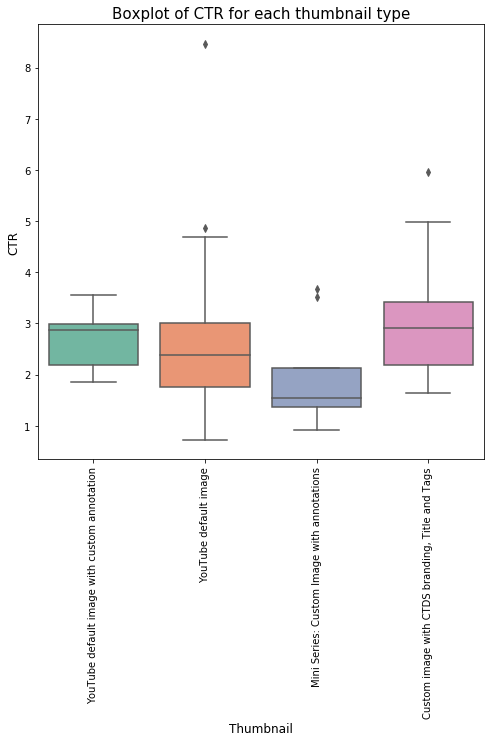

In [32]:
plt.figure(figsize=(8,8))
ax=sns.boxplot(x=data['description'],y=data['youtube_ctr'],palette=sns.color_palette('Set2'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Boxplot of CTR for each thumbnail type",fontsize=15)
plt.xlabel("Thumbnail",fontsize=12)
plt.ylabel("CTR",fontsize=12)
plt.show()

When we compare the CTR's with the thumbnail an interesting observation can be made . 

* In the earlier analysis of thumbnail vs impressions we saw that the median impression and impression views are higher for default thumbnail ( type 0 ) and default with annotation thumbnail ( type 1 ) . 

* But the CTR presents a different picture . Median value of click through rates were higher for custom CTDS thumbnail (type 3) followed closely by default with annotation thumbnail (type 1).

* Based on the analysis, It is recommended that Sanyam should continue posting his videos either with the custom CTDS thumbnail or with youtube default thumbnail for higher click through rates.

Comparing impressions with CTR by thumbnail , 

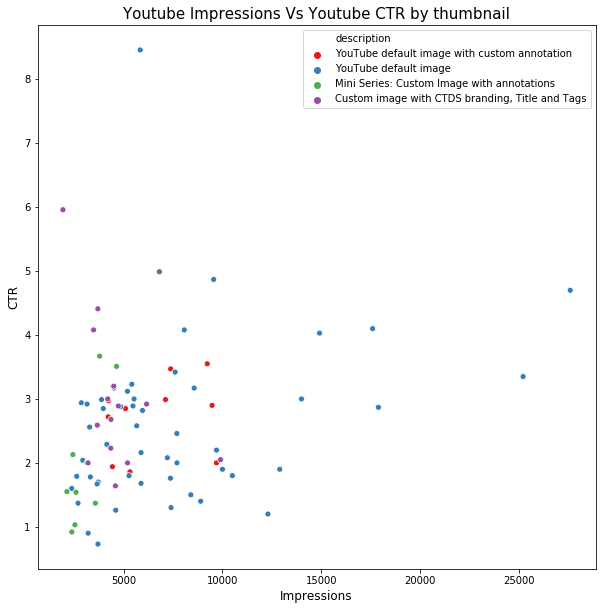

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['youtube_impressions'],y=data['youtube_ctr'],hue=data['description'],palette='Set1')
plt.title("Youtube Impressions Vs Youtube CTR by thumbnail",fontsize=15)
plt.xlabel("Impressions",fontsize=12)
plt.ylabel("CTR",fontsize=12)
plt.show()

To summarise , default image and custom CTDS branding thumbnails have had higher impressions and CTR's for the show.

How has the trend been for each category,

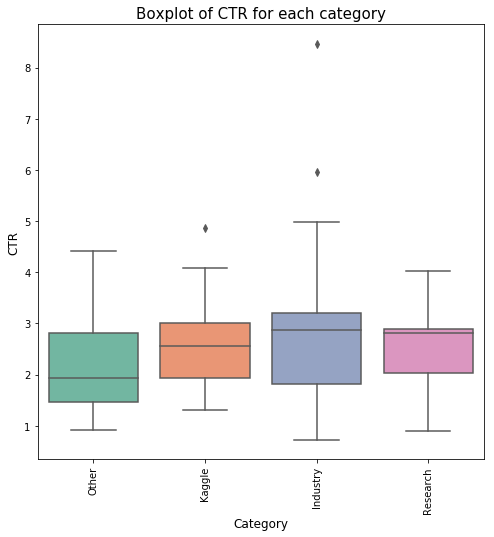

In [59]:
plt.figure(figsize=(8,8))
ax=sns.boxplot(x=data['category'],y=data['youtube_ctr'],palette=sns.color_palette('Set2'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Boxplot of CTR for each category",fontsize=15)
plt.xlabel("Category",fontsize=12)
plt.ylabel("CTR",fontsize=12)
plt.show()

Click through rates have been higher for episodes featuring Industry and Research experts which is followed closely by Kagglers.

### Average Watch Time 

Once the viewer has started watching the episode , what is the average minutes the viewer has watched the video ?

In [41]:
data['youtube_avg_duration_mins']=data['youtube_avg_watch_duration']/60

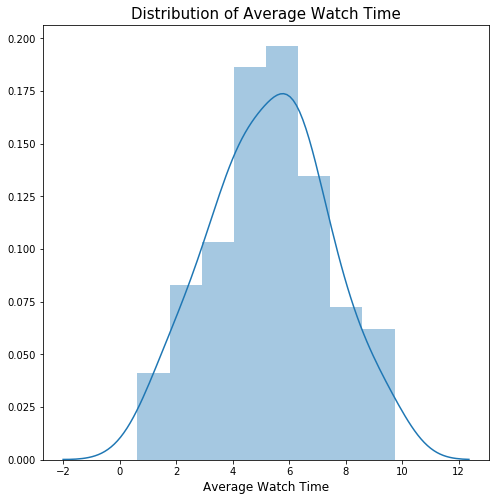

In [44]:
plt.figure(figsize=(8,8))
sns.distplot(data['youtube_avg_duration_mins'])
plt.title("Distribution of Average Watch Time",fontsize=15)
plt.xlabel("Average Watch Time",fontsize=12)
plt.show()

The average watch duration has been around 4-6 minutes across the episodes.

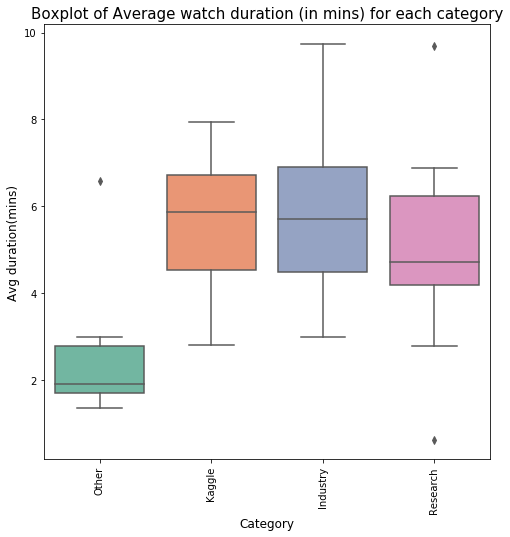

In [47]:
plt.figure(figsize=(8,8))
ax=sns.boxplot(x=data['category'],y=data['youtube_avg_duration_mins'],palette=sns.color_palette('Set2'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Boxplot of Average watch duration (in mins) for each category",fontsize=15)
plt.xlabel("Category",fontsize=12)
plt.ylabel("Avg duration(mins)",fontsize=12)
plt.show()

The average watch duration was higher for episodes featuring Kagglers and Industry experts .Let us compare the total episode duration with the average duration to make conclusive statements.

In [48]:
data['episode_duration_mins']=data['episode_duration']/60

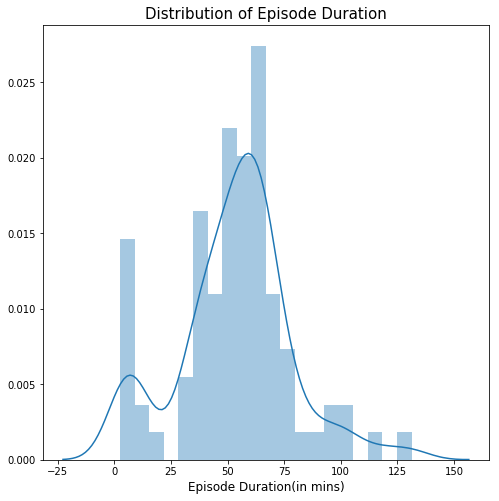

In [55]:
plt.figure(figsize=(8,8))
sns.distplot(data['episode_duration_mins'],bins=20)
plt.title("Distribution of Episode Duration",fontsize=15)
plt.xlabel("Episode Duration(in mins)",fontsize=12)
plt.show()

The episode duration has hovered around 50 to 75 mins.

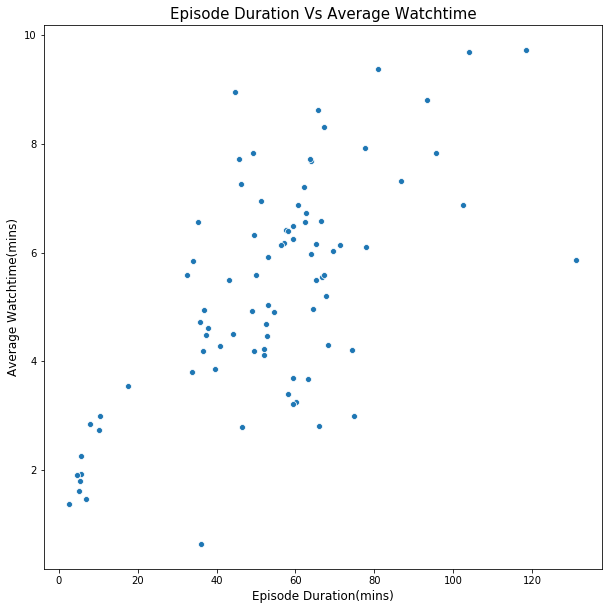

In [57]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['episode_duration_mins'],y=data['youtube_avg_duration_mins'])
plt.title("Episode Duration Vs Average Watchtime",fontsize=15)
plt.xlabel("Episode Duration(mins)",fontsize=12)
plt.ylabel("Average Watchtime(mins)",fontsize=12)
plt.show()

Looking at the plot we can say that the average watchtime has always been higher for episodes going beyond an hour(after 80 mins) .Let us include the category to understand better.

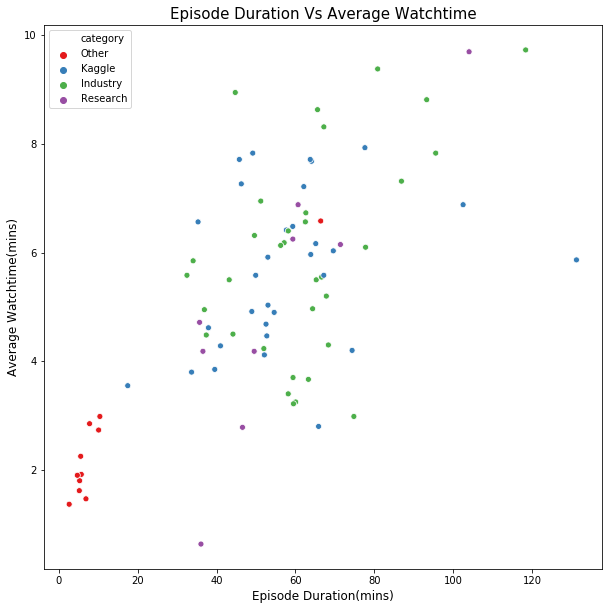

In [58]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['episode_duration_mins'],y=data['youtube_avg_duration_mins'],hue=data['category'],palette='Set1')
plt.title("Episode Duration Vs Average Watchtime by category",fontsize=15)
plt.xlabel("Episode Duration(mins)",fontsize=12)
plt.ylabel("Average Watchtime(mins)",fontsize=12)
plt.show()

There has been 1 show from Industry which has had higher watch time compared to others .The average watch time and episode duration has hovered around a large interval for the categories.

### Conclusion

Following are few reference links I used for the notebook ,

1.Thumbnails were taken from [CTDS Youtube Channel](https://www.youtube.com/channel/UCRjtBP-o5FbgRzX2BHQEFtQ)

2.[Google Support on youtube statistics](https://support.google.com/youtube/answer/9314486?hl=en#:~:text=An%20impression%20is%20counted%20when,shown%20to%20someone%20on%20YouTube.&text=For%20example%2C%20impressions%20are%20counted,shown%20on%20a%20different%20website.)

3.[Tutorial on CTRs](https://creatoracademy.youtube.com/page/lesson/analytics-impressions)
